# Excercises : Finite-difference basics



In [1]:
%matplotlib notebook

# Use NumPy arrays instead of built-in Python types
import numpy as np

# We will want to plot our results, so let's import MatplotLib
import matplotlib.pyplot as plt

# Seaborn provides a better set of parameters for MatplotLib plots
import seaborn as sns
sns.set()

## Create a numpy array representing a one-dimensional mesh

In [2]:
# Create a uniform mesh for the domain [-1,1] using N points
N = 10
xmin = -1
xmax = 1

In [ ]:
# If we were to do this in C/Fortran/C++, we would first allocate an 
# array for "x" of N size.
# To do this in NumPy, we could do something like this.
x = np.empty(N)

# Then we would compute the values of the x-coordinates using the
# formula: x_i = x_0 + i * dx
#
dx = (xmax - xmin) / (N-1)
for i in range(len(x)):
    x[i] = xmin + i * dx
print(x)

In [ ]:
# Using NumPy, we can do the same thing as the Cell above, but simplier.
#
x = np.linspace(xmin, xmax, N)
print(x)

## Brief tangent on how Numpy stores information

When we assign variables (left-hand sides) to values (right-hand sides) in Python, we are doing two things. First, the data is either loaded or some "storage" space in memory is created for the variable, and then a value is assigned to that locationg in memory. In NumPy, simple assignments **do NOT make a copy** of array object. In other words, the assignment does not store values of the data as copied from the right-hand side. Instead, it takes its "reference". For simple assignments, the left-hand values get assigned the same `id()` of the original array, similar to the pointer assignment in C.

There are a few instances where this could potentially cause problems. Let's look at an example. 

Define the function $f(x) = x$.

In [ ]:
# In the previous cells we have already defined the domain of the function, x. 

# What happens when do the following? Yes, this is f(x) = x, but is the result
# what I expected?
#
f = x

for i in range(len(x)):
    print(f'{i} : x = {x[i]:.2},  f(x) = {f[i]:.2}')

In [ ]:
# This looks okay, but what happens when I modify the variable f.
# Let's add one to the function f(x) = f(x) + 1

f += 1  # Same as f = f + 1

for i in range(len(x)):
    print(f'{i} : x = {x[i]:.2},  f(x) = {f[i]:.2}')

In [ ]:
# We see that both x and f changed!!

# We can use the function id() to see how the variables are stored in memory
#
print(id(x))
print(id(f))

In [ ]:
# There are the same!
# Simple assignments are not copies. This is done for reasons of efficiency. 

# So, what do we mean by "simple". Create some examples and check!
#
# Here is one example of an assignment that behaves as you might expect.
#
x = np.linspace(xmin, xmax, N)
f = x**2

print(id(x))
print(id(f))

## Discretize a function on the mesh

Let's start with a very simple function

\begin{equation}
f(x) = x
\end{equation}

We know the function, $f(x)$, is continuous over the entire domain, $(-\infty, \infty)$. Using a numpy array, how do we define this function on the discrete mesh we created in the previous step?

In [ ]:
# Redefine x 
x = np.linspace(xmin, xmax, N)

# We can use the "copy" command to force NumPy to do a copy rather than use the
# id() for the assignment.
#
f = np.copy(x)
print(id(x))
print(id(f))

In [ ]:
# Let's plot the function, this creates a single plot (ncols=2 would create two plots side-by-side).
# You can adjust the figsize. This is great for being able to import figures into other documents
# and not having to worry about the fontsize of shrinking too much as you scale the image.
#
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))

line = ax.plot(x, f, lw=2, color='b', label=r'$f(x) = x$')

# This sets the domain view of the plot, ax.set_ylim() would set the range.
ax.set_xlim((-1.0, 1.0))

# Define a title.
ax.set_title(r'Plot of the function $f(x) = x$', fontsize=15) 

# In the ax.plot() function above, we gave our line a label. Invoking
# the ax.legend() method turns the legend on, and we can see the labels.
ax.legend(loc=4, fontsize=15)

# Give some names to the x-axis and y-axis
ax.set_xlabel(r'$x$', fontsize=15.0)
ax.set_ylabel(r'$f(x)$', fontsize=15.0)    

## Change the number of points in the mesh

Often we will want to study the behavior of a numerical method we different levels of refinement. For a uniform mesh, refinement simply means increasing the total number of discrete points (nodes) used to define the mesh of the computational domain. Good practice is to use three levels of successive refinement. We will define a base number of mesh points, $N$, and the a **coarse** mesh with half the number of points, and a **fine** mesh with double the number of points.

To simplify the notation, let's refer to these as $N_0$, $N_1$, and $N_2$

\begin{equation}
N_\textrm{coarse} = N_0 = \frac{N}{2}
\end{equation}

\begin{equation}
N_\textrm{base} = N_1 = N
\end{equation}

\begin{equation}
N_\textrm{fine} = N_2 = 2 N
\end{equation}




In [3]:
# Create three uniform meshs for the domain [-1,1]
#   - x_coarse = x_0
#   - x_base = x_1
#   - x_fine = x_2

N0 = 10
N1 = 20
N2 = 40

x0 = np.linspace(xmin, xmax, N0)
x1 = np.linspace(xmin, xmax, N1)
x2 = np.linspace(xmin, xmax, N2)

dx0 = x0[1] - x0[0]
dx1 = x1[1] - x1[0]
dx2 = x2[1] - x2[0]

## Discretize a function on each mesh

Let's use a slightly more complex function, 

\begin{equation}
f(x) = x^2
\end{equation}

Recall we are interested in how the derivatives of a function are computed on a discrete domain (mesh) using a finite-difference approximation. Since the derivative of $f(x) = x^2$, is easy to compute analytically, $f^{\prime}(x) = x$, we can use it to confirm wether or not our finite-difference approximation is qualitiatively correct. 

In [4]:
f0 = x0**2
f1 = x1**2
f2 = x2**2

## Compute the finite-difference approximation of the first derivative

Compute $f^{\prime}(x)$ at each mesh point using the following finite-difference approximation for the first derivative:

\begin{equation}
\frac{\textrm{d} f}{\textrm{d} x} \approx \frac{ f(x_i + \Delta x) - f(x_i) }{\Delta x} = \frac{f_{i+1} - f_i }{\Delta x}
\end{equation}

To analyze how our approximations might change for different number of mesh points, compute the first derivative for each of the different size meshes.

In [14]:
# Let's use this finite-difference formula (first-order, forward) to
# compute dfdx at each point in the domain. 

dfdx0 = np.zeros_like(f0)
for i in range(len(dfdx0)-1):
    dfdx0[i] = (f0[i+1] - f0[i]) / dx0
    
# What do we do about dfdx0 at the last node, N0? Our, first-order, forward 
# difference stencil extends beyond the range of our domain.
# Two solutions 
#  - ghost cells, which we haven't created so we can't use that
#  - modify the difference formulae
#
# Using a first-order, backward difference at the last point.
#
# We can use "negative" indices to index into the end of the array.
#
dfdx0[-1] = (f0[-1] - f0[-2]) / dx0

<IPython.core.display.Javascript object>


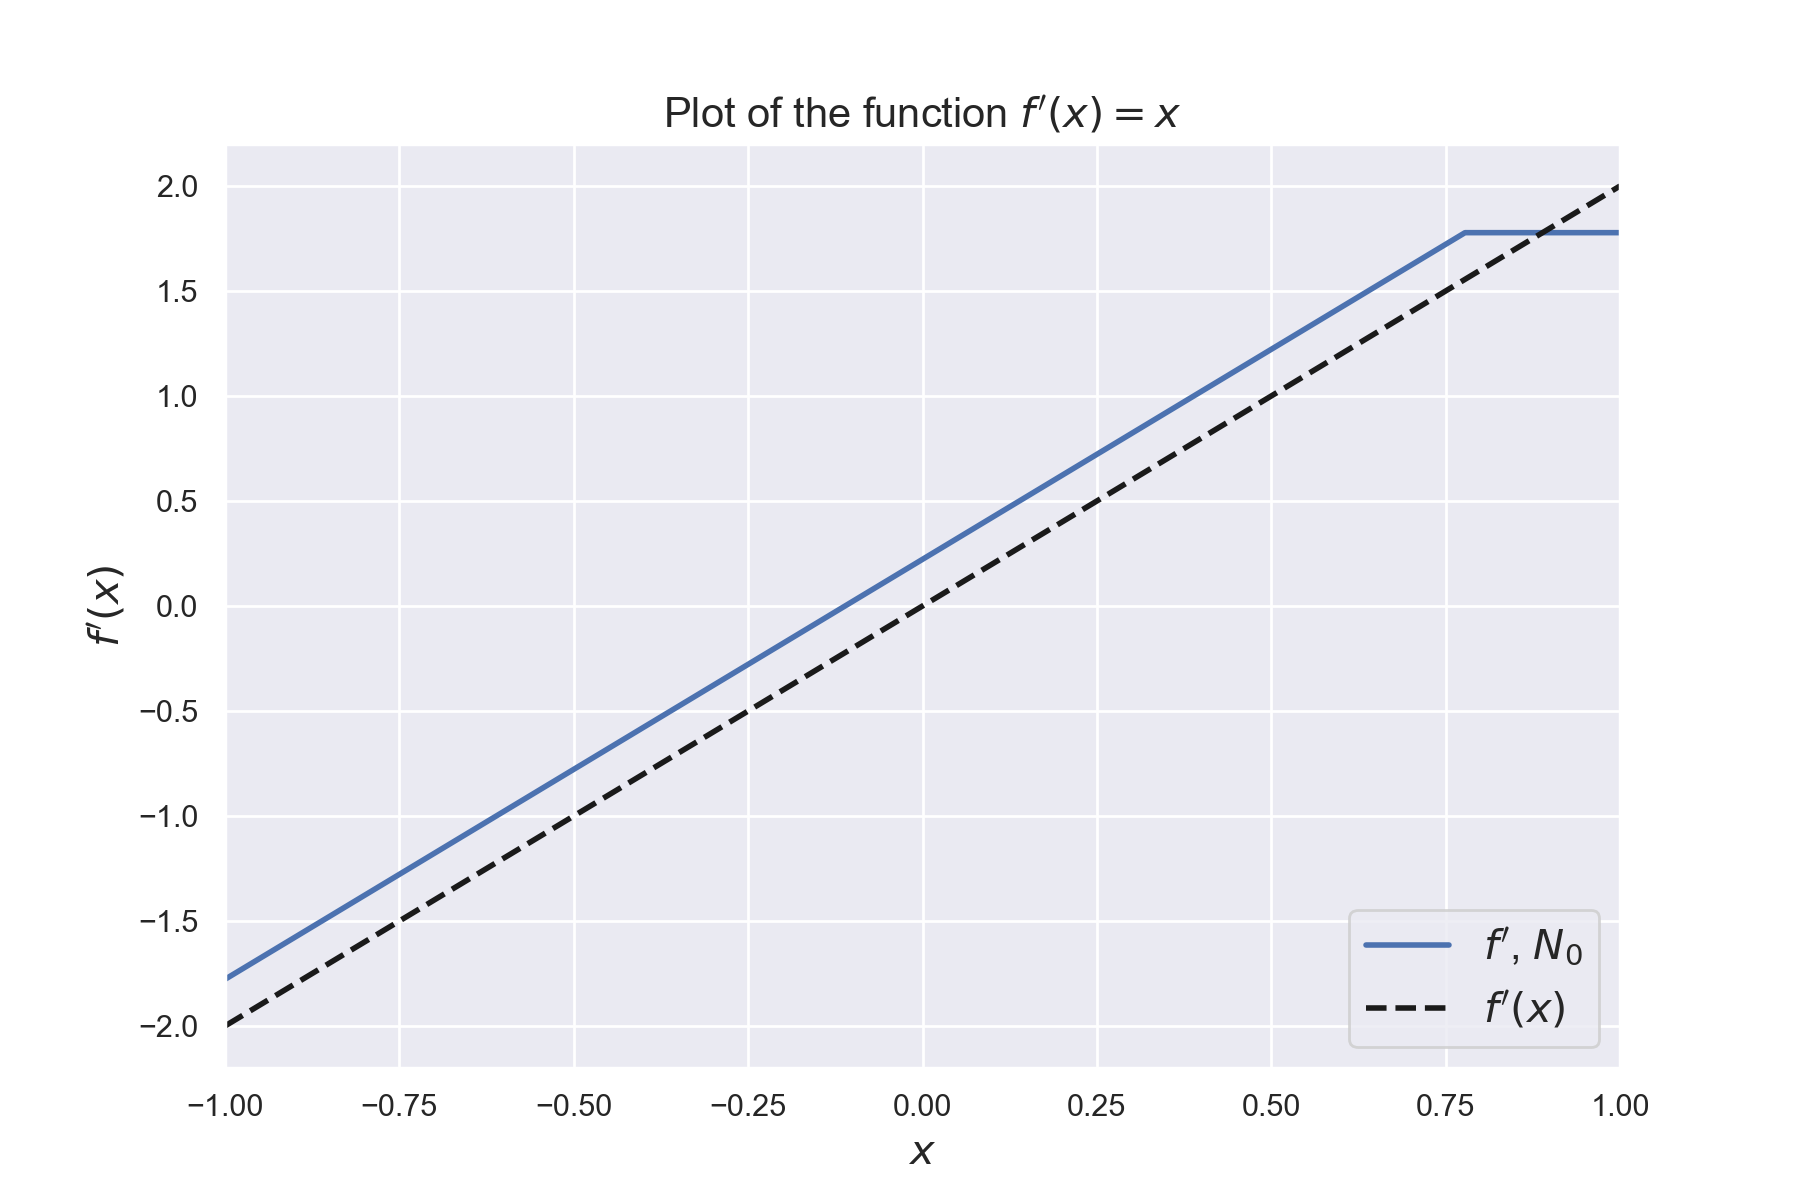

Text(0, 0.5, '$f^{\\prime}(x)$')

In [18]:
# Let's plot the derivative, and compare it to the analytical solution
#
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))

line = ax.plot(x0, dfdx0, lw=2, color='b', label=r'$f^{\prime}$, $N_0$')

dfdx0_exact = 2.0 * x0
line = ax.plot(x0, dfdx0_exact, ls='--', lw=2, color='k', label=r'$f^{\prime}(x)$')

ax.set_xlim((xmin, xmax))

# Define a title.
ax.set_title(r'Plot of the function $f^{\prime}(x) = x$', fontsize=15) 

# In the ax.plot() function above, we gave our line a label. Invoking
# the ax.legend() method turns the legend on, and we can see the labels.
ax.legend(loc=4, fontsize=15)

# Give some names to the x-axis and y-axis
ax.set_xlabel(r'$x$', fontsize=15.0)
ax.set_ylabel(r'$f^{\prime}(x)$', fontsize=15.0)    

In [19]:
# Instead of copying code to compute the same derivatives for the
# other mesh refinements, lets create a function.
#
# Rule of thumb: If the same "pattern" appears in your code, try to make 
# it a function. This reduces the amount of copied code, and increases
# the readability as well reduces the chances for bugs.
#
def forward_first(u, deltaX):
    """
    A possible implementation for computing the first derivative using 
    a first-order, forward difference formula.
    
    Args:
        u (array-like) - Values of the function on a 1-D uniform mesh
        deltaX (float) - Mesh spacing
    Returns:
        dudx (array-like) - first-derivative of the function u with respect to x.
    """
    # dudx is defined as the same size as u
    dudx = np.zeros_like(u)
    
    # Compute dudx from 0 to the second-to-the last index in the array. The 
    # range should determined by the width of the stencil.
    #
    for i in range(len(u)-1):
        dudx[i] = (u[i+1] - u[i]) / deltaX
        
    # Note: We can't compute dudx at the last index, so let's use a 
    # backward difference. 
    dudx[-1] = (u[-1] - u[-2]) / deltaX
    
    return dudx

<IPython.core.display.Javascript object>


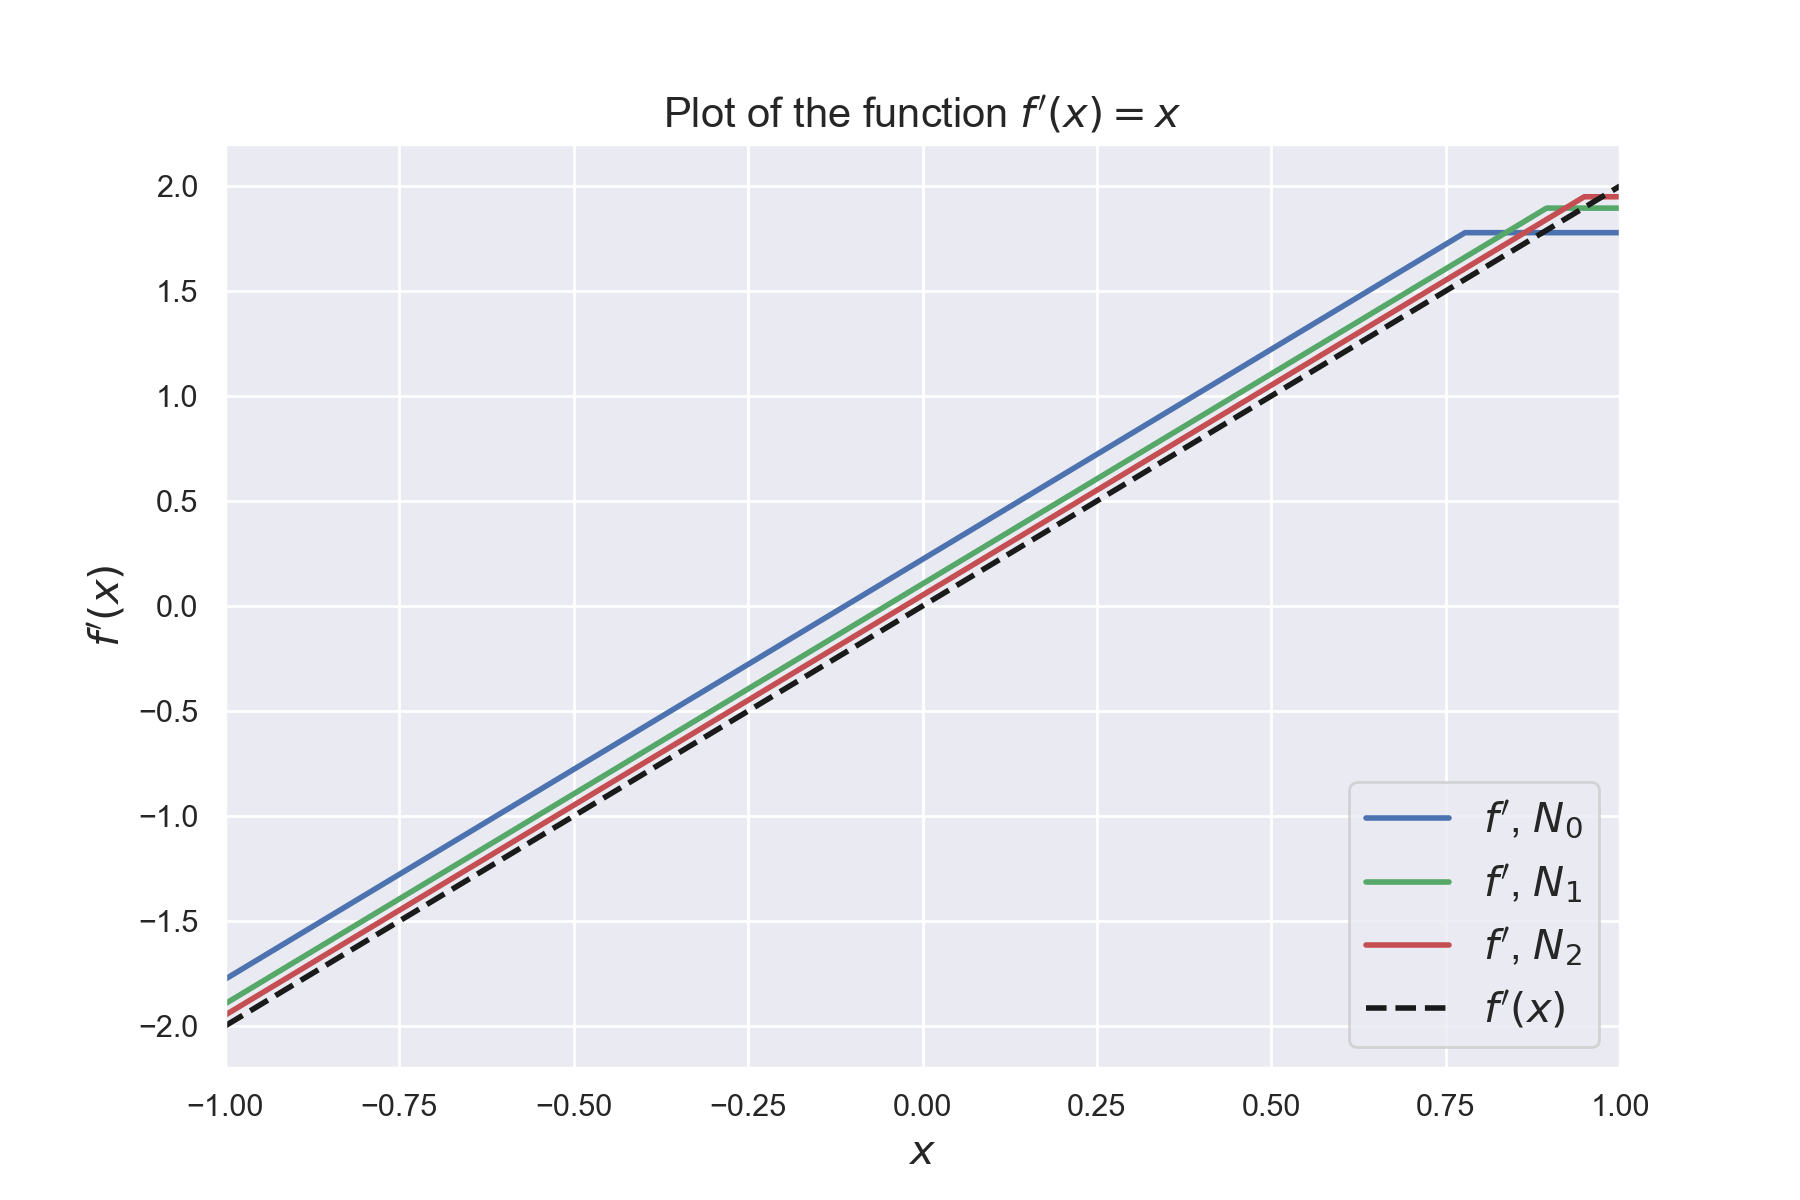

Text(0, 0.5, '$f^{\\prime}(x)$')

In [22]:
dfdx0 = forward_first(f0, dx0)
dfdx1 = forward_first(f1, dx1)
dfdx2 = forward_first(f2, dx2)

# Let's plot the derivative, and compare it to the analytical solution
#
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))

line = ax.plot(x0, dfdx0, lw=2, color='b', label=r'$f^{\prime}$, $N_0$')
line = ax.plot(x1, dfdx1, lw=2, color='g', label=r'$f^{\prime}$, $N_1$')
line = ax.plot(x2, dfdx2, lw=2, color='r', label=r'$f^{\prime}$, $N_2$')

dfdx0_exact = 2.0 * x0
line = ax.plot(x0, dfdx0_exact, ls='--', lw=2, color='k', label=r'$f^{\prime}(x)$')

ax.set_xlim((xmin, xmax))

# Define a title.
ax.set_title(r'Plot of the function $f^{\prime}(x) = x$', fontsize=15) 

# In the ax.plot() function above, we gave our line a label. Invoking
# the ax.legend() method turns the legend on, and we can see the labels.
ax.legend(loc=4, fontsize=15)

# Give some names to the x-axis and y-axis
ax.set_xlabel(r'$x$', fontsize=15.0)
ax.set_ylabel(r'$f^{\prime}(x)$', fontsize=15.0)  

## Using NumPy arrays

Turns out there is an easier (and more computationally efficient) way of computing a finite-difference in Python. The notation takes some adjustment, but it is the *correct* way to do numerical calculations in Python. Instead of using "for" loops, we can use a **vectorized** notation. Let's redefine the function that computed the first-order, forward difference. 

In [29]:
# Create a 10 x 10 matrix
y = np.ones((10,10))

# Assign the first row to the value of 2
y[0,:] = 2

# Assign the third row, columns 3 through 8
y[2,2:8] = 8

# Assign the last row to 3
y[-1,:] = 3

# Assign the second to last row, and the columns 4 to the end to 9
y[-2,3:] = 9

# Assign the third to last row, and the columns 4 to the second to last end to 7
y[-3,3:-1] = 7

print(y)

[[2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 8. 8. 8. 8. 8. 8. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 7. 7. 7. 7. 7. 7. 1.]
 [1. 1. 1. 9. 9. 9. 9. 9. 9. 9.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]]


In [36]:
# We can use this notation to add/multiply/subtract "slices" of vectors
y1 = np.ones((10,))
y1[2:8] = 8
print(f'y1 = {y1}')

y2 = 5.0 * np.ones((10,))
y2[3:7] = 2
print(f'y2 = {y2}')
print(f'Shape of y1 and y2 is {y1.shape}\n')

# Shapes need to conform, but as long as the shape can be "broadcasted" 
# we can do things like the following.

y3 = y1[2:6] + y2[6:]
print(f'y3 = {y3}')
print(f'Shape of y3 is {y3.shape}\n')

y4 = y1[:-1] + y2[1:]
print(f'y4 = {y4}')
print(f'Shape of y4 is {y4.shape}')

y1 = [1. 1. 8. 8. 8. 8. 8. 8. 1. 1.]
y2 = [5. 5. 5. 2. 2. 2. 2. 5. 5. 5.]
Shape of y1 and y2 is (10,)

y3 = [10. 13. 13. 13.]
Shape of y3 is (4,)

y4 = [ 6.  6. 10. 10. 10. 10. 13. 13.  6.]
Shape of y4 is (9,)


In [37]:
def forward_first_vectorize(u, deltaX):
    """
    Compute the first derivative using a first-order, forward difference formula.
    
    Args:
        u (array-like) - Values of the function on a 1-D uniform mesh
        deltaX (float) - Mesh spacing
    Returns:
        dudx (array-like) - first-derivative of the function u with respect to x.
    """
    # Numpy supports "vectorized" notation. Writing/reading code like this is 
    # difficult at first, but it is the most efficient (and compact) method.
    #
    dfdx = np.zeros_like(u)
    dfdx[:-1] = (u[1:] - u[:-1]) / deltaX
    dfdx[-1] = (u[-1] - u[-2]) / deltaX
    return dfdx

<IPython.core.display.Javascript object>


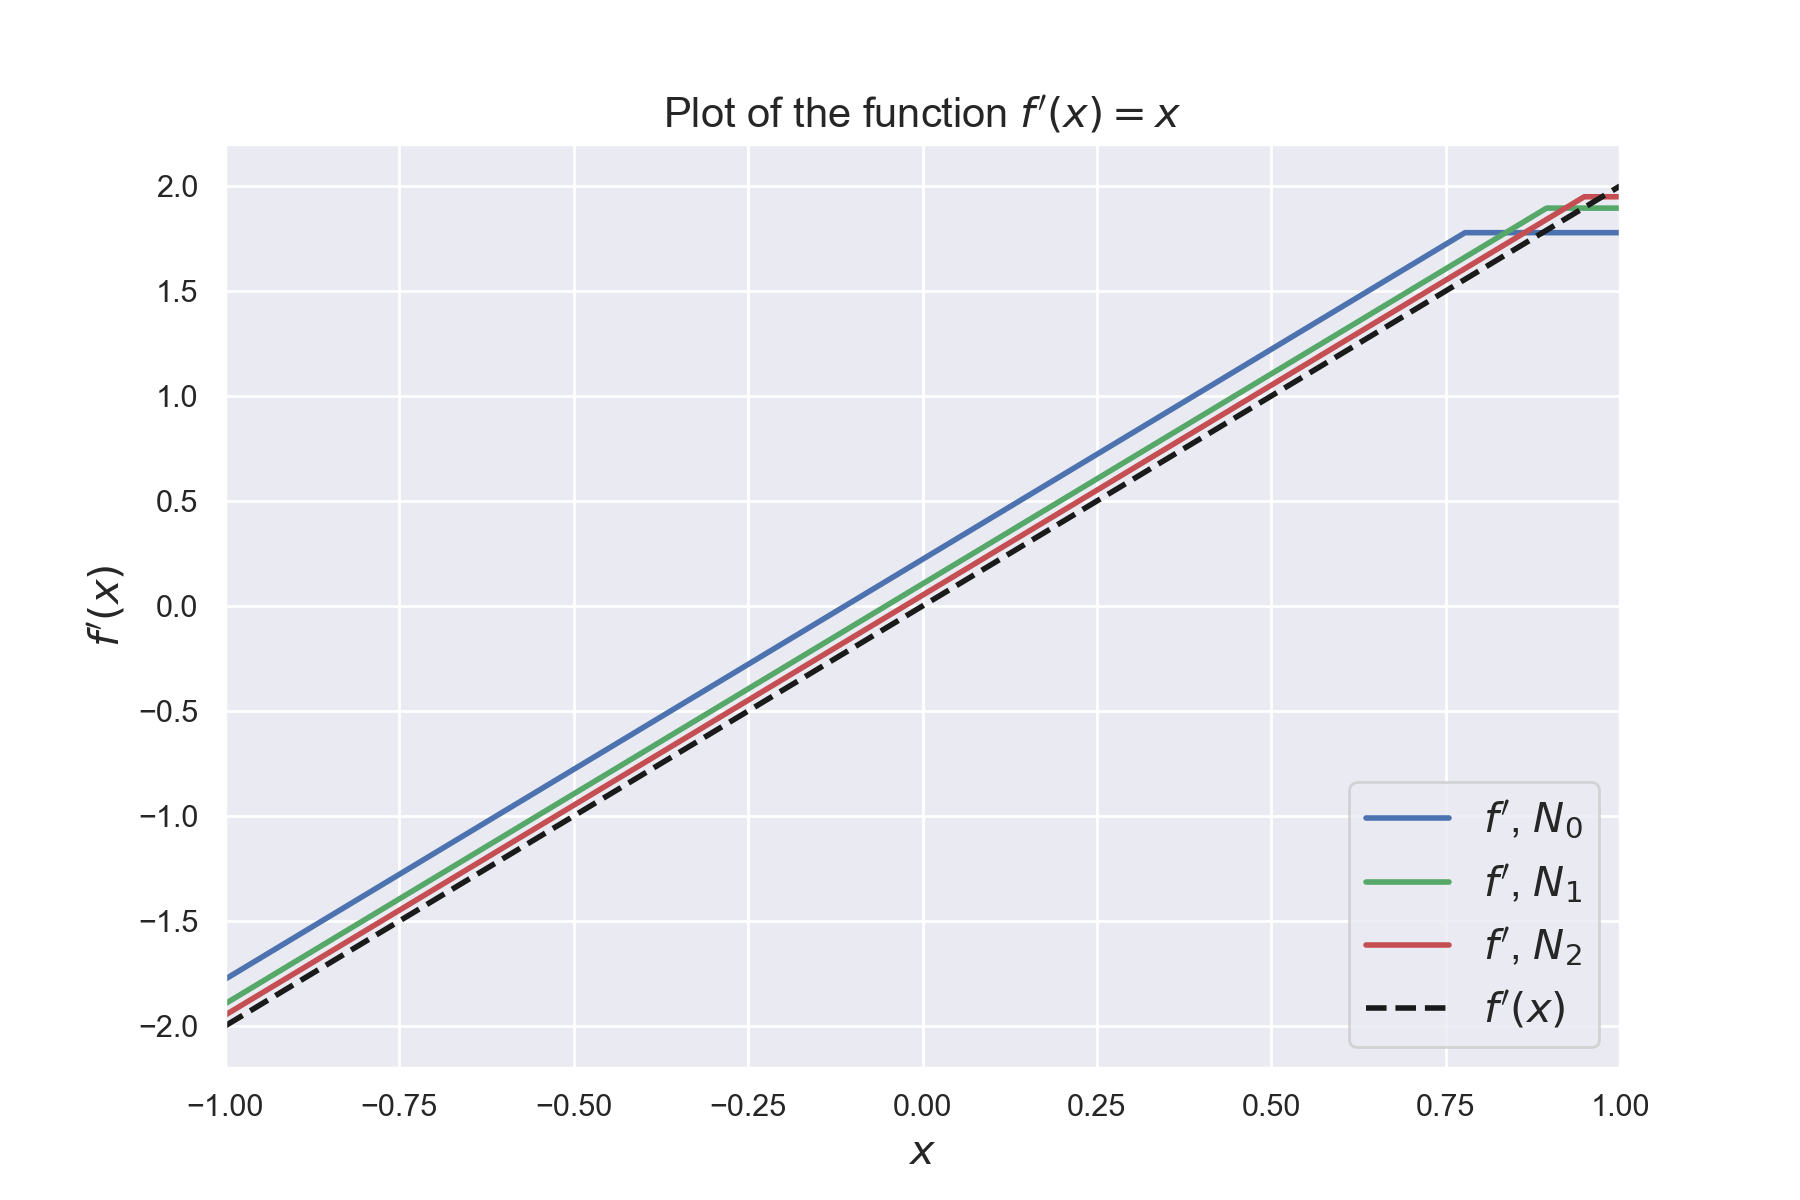

Text(0, 0.5, '$f^{\\prime}(x)$')

In [38]:
dfdx0 = forward_first_vectorize(f0, dx0)
dfdx1 = forward_first_vectorize(f1, dx1)
dfdx2 = forward_first_vectorize(f2, dx2)

# Let's plot the derivative, and compare it to the analytical solution
#
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))

line = ax.plot(x0, dfdx0, lw=2, color='b', label=r'$f^{\prime}$, $N_0$')
line = ax.plot(x1, dfdx1, lw=2, color='g', label=r'$f^{\prime}$, $N_1$')
line = ax.plot(x2, dfdx2, lw=2, color='r', label=r'$f^{\prime}$, $N_2$')

dfdx0_exact = 2.0 * x0
line = ax.plot(x0, dfdx0_exact, ls='--', lw=2, color='k', label=r'$f^{\prime}(x)$')

ax.set_xlim((xmin, xmax))

# Define a title.
ax.set_title(r'Plot of the function $f^{\prime}(x) = x$', fontsize=15) 

# In the ax.plot() function above, we gave our line a label. Invoking
# the ax.legend() method turns the legend on, and we can see the labels.
ax.legend(loc=4, fontsize=15)

# Give some names to the x-axis and y-axis
ax.set_xlabel(r'$x$', fontsize=15.0)
ax.set_ylabel(r'$f^{\prime}(x)$', fontsize=15.0)  

## How do we know our finite-difference approximations are accurate?

1. We do a solution, there is some analytical solution.
2. We would compare the solutions at different resolutiosn, coarse to fine. 
3. Method of manufactured solutions.

In [ ]:
# See the above plots.

## Convert the finite-difference approximation into a matrix operator 

As discussed during lecture, we can write the finite-difference approximations at each point in the mesh as a matrix operator, $\mathbf{A}$. Consider the 1-D, advection equation, 

\begin{equation}
\frac{\partial u}{\partial t} + a \frac{\partial u}{\partial x} = 0
\end{equation}

Using the method of lines, we can write a numerical approximation to the 1-D, advection equation like

\begin{equation}
\frac{\textrm{d} \mathbf{u} }{\textrm{d} t} = \mathbf{A} \mathbf{u}
\end{equation}

where the vector $\mathbf{u} = [u(x_0,t), u(x_1,t), \dots, u(x_N,t)]$ where the matrix $\mathbf{A}$ is 

\begin{equation}
\mathbf{A} = -a \mathcal{D}
\end{equation}

where $\mathcal{D}$ is the difference-operator, sometimes it is written as $\delta_x$ or as $\mathcal{D}_x$, where the subscript means the difference-operator is an approximation of the first-derivative with respect to $x$, $\delta_{xx}$ would be an approximationof the second-derivative with respect to $x$.

Using the approximation of the first derivative, 

\begin{equation}
\frac{\textrm{d} u}{\textrm{d} x} \approx \frac{ u(x_i + \Delta x) - u(x_i) }{\Delta x} = \frac{u_{i+1} - u_i }{\Delta x}
\end{equation}

what is the matrix operator for the one-dimensional, advection equation. Assume the initial condition for $u(x,t)$ is given as

\begin{equation}
u(x,0) = f(x)
\end{equation}

where $f(x) = x^2$ 


## Compute the RHS using the matrix operator

We can define a function to compute the matrix operator, $\mathcal{D}_x^{+}\mathbf{u}$. Let's call this function `foward_first_diffop`. Note that we only need to define the size or shape of the matrix operator. For convenience, I will pass the value of $\Delta x$ as an argument to this function, but alternatively (and maybe a better generalization), we could have instead just passed the shape and then multiplied the resulting matrix operator by one over $\Delta x$. 

In [39]:
def forward_first_diffop(N, deltaX):
    """
    Return a banded-matrix for the forward, first-order finite-difference approximation.
    
    Args:
        N (int) : Number of mesh points.
    Returns
        (ab, offsets) : Return a tuple of the diagonal elements plus the offsets. The 
            diagonals contain the non-zero entries of the difference operator, order 
            from the top to bottom diagonals as defined by the offsets array.
    """
    ab = np.ones((2,N)) 
    ab[0] = 1 / deltaX  # u_{i+1} - top diagonal
    ab[1] = -1 / deltaX # u_i - main diagonal
    offsets = np.array([1,0])
    return (ab, offsets)

<IPython.core.display.Javascript object>


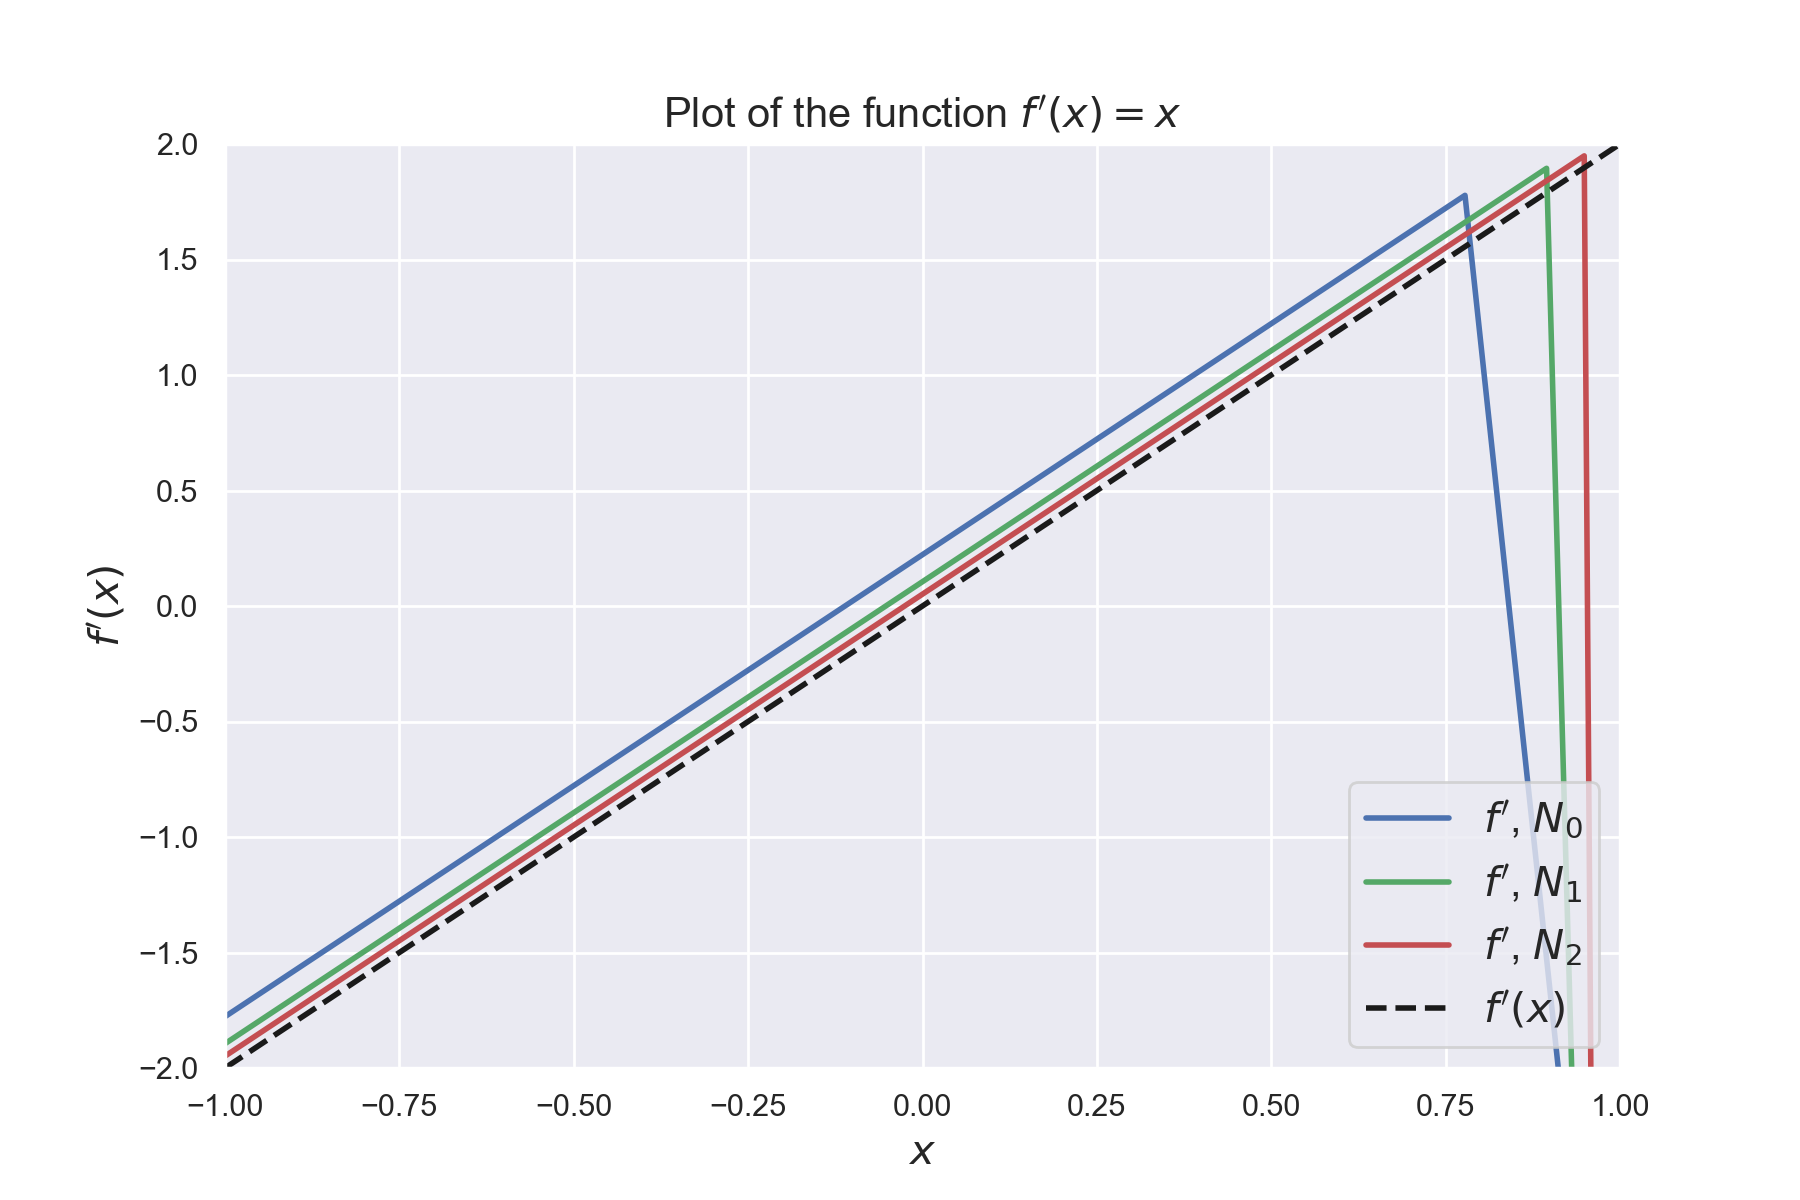

Text(0, 0.5, '$f^{\\prime}(x)$')

In [41]:
from scipy.sparse import dia_matrix

D0 = dia_matrix(forward_first_diffop(N0, dx0), shape=(N0, N0))
D1 = dia_matrix(forward_first_diffop(N1, dx1), shape=(N1, N1))
D2 = dia_matrix(forward_first_diffop(N2, dx2), shape=(N2, N2))

# Compute the finite-difference
dfdx0 = D0 * f0
dfdx1 = D1 * f1
dfdx2 = D2 * f2

# Let's plot the derivative, and compare it to the analytical solution
#
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))

line = ax.plot(x0, dfdx0, lw=2, color='b', label=r'$f^{\prime}$, $N_0$')
line = ax.plot(x1, dfdx1, lw=2, color='g', label=r'$f^{\prime}$, $N_1$')
line = ax.plot(x2, dfdx2, lw=2, color='r', label=r'$f^{\prime}$, $N_2$')

dfdx0_exact = 2.0 * x0
line = ax.plot(x0, dfdx0_exact, ls='--', lw=2, color='k', label=r'$f^{\prime}(x)$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((-2, 2))

# Define a title.
ax.set_title(r'Plot of the function $f^{\prime}(x) = x$', fontsize=15) 

# In the ax.plot() function above, we gave our line a label. Invoking
# the ax.legend() method turns the legend on, and we can see the labels.
ax.legend(loc=4, fontsize=15)

# Give some names to the x-axis and y-axis
ax.set_xlabel(r'$x$', fontsize=15.0)
ax.set_ylabel(r'$f^{\prime}(x)$', fontsize=15.0)  